<a href="https://colab.research.google.com/github/amrityap/Amritya_Pradeep_Prediction_using_Supervised_ML/blob/main/Amritya_Pradeep_Prediction_using_Supervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.Predict the percentage of a student based on the no. of study hours.**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import seaborn as sns

In [ ]:
data = pd.read_csv('http://bit.ly/w-data')
print("Data imported Successfully")
data.head(10)

Data imported Successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
data.shape

(25, 2)

In [ ]:
data.isnull == True

False

We can see that there is no null value.

**Creating a 2D plot of the data points**

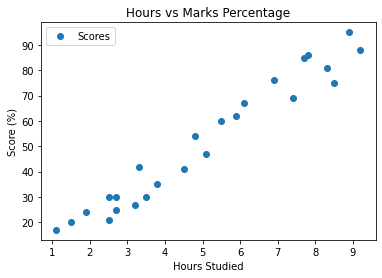

In [ ]:
data.plot(x ='Hours', y = 'Scores', style = 'o')
plt.title('Hours vs Marks Percentage')    
plt.xlabel('Hours Studied')    
plt.ylabel('Score (%)')    
plt.show()  

From the above graph we can notice a clear linear relationship between the number of hours studied and the Percentage Score. 


**Preparation of Data**

Lets divide the data into "attributes" and "labels".



In [ ]:
x = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In the next step we'll create training and testing set.


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

**Training the Algo.**

As we have splitted the data in training and testing sets, we can now train our algorithm.

In [ ]:
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

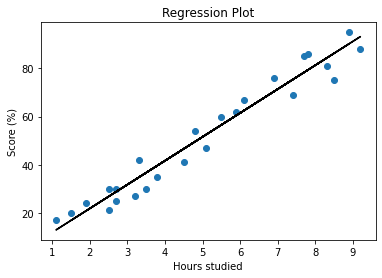

In [ ]:
#plotting the regression line and the test data

plt.scatter(x, y)
plt.plot(x, regressor.coef_*X+regressor.intercept_, 'black');
plt.title("Regression Plot")
plt.xlabel("Hours studied")
plt.ylabel("Score (%)")
plt.show()


As we have trained the algorithm we can start making predictions.

In [ ]:
# testing data - in Hours
print('Testing Data - in Hours:\n', x_test) 
# score prediction
y_pred = regressor.predict(x_test)


Testing Data - in Hours:
 [[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [ ]:
# Actual vs Predicted Score
df = pd.DataFrame({'Actual Score(%)': y_test, 'Predicted Score(%)': y_pred})
df

,Actual Score(%),Predicted Score(%)
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**Evaluating the model**

In [ ]:
#calculating the accuracy of the model
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982


As the Mean absolute error is low the chances of error of prediction through this model are very less.

---




**2.What will be predicted score if a student studies for 9.25 hrs/ day?**

In [ ]:
hoursPerDay = 9.25
pred_score = regressor.predict([[hours]])
print("No of Hours =", hoursPerDay)
print("Predicted Score = ", pred_score)

No of Hours = 9.25
Predicted Score =  [93.69173249]


From the above solution we can say that if a student is studying 9.25 hrs/day, he/she is likely to get a score of 93.69%.